In [1]:
import pandas as pd
import matplotlib.pylab as plt

#Extracting data:

project1_df = pd.read_csv('/Users/MIGUEL/Desktop/CLAB1/Ironhack-Module-1-Project---Pipelines-/data/processed/df_totalCLEAN.csv')

#Basics Analytics:

#print(project1_df.info(memory_usage='deep'))
#print(project1_df.describe(include='all'))

    #Checking Outliers: 

stats = project1_df.describe().T
stats['IQR'] = stats['75%'] - stats['25%']
stats

outliers = pd.DataFrame(columns=project1_df.columns)

for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = project1_df[(project1_df[col] < lower) | 
                   (project1_df[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)
    'sort=True'

outliers

#grafico 2- binning


/Users/MIGUEL/miniconda3/envs/base2/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,worthChange millions USD,Outlier,Source,age,country,gender,image,name,position,worth BUSD
0,0,worth BUSD,Technology ==> Amazon,54,None,Male,https://specials-images.forbesimg.com/imageser...,jeff bezos,1,112
1,0,worth BUSD,Technology ==> Microsoft,62,United States,None,https://specials-images.forbesimg.com/imageser...,bill gates,2,90
2,0,worth BUSD,Finance and Investments ==> Berkshire Hathaway,87,United States,Male,https://specials-images.forbesimg.com/imageser...,warren buffett,3,84
3,0,worth BUSD,Fashion & Retail ==> LVMH,69,None,None,https://specials-images.forbesimg.com/imageser...,bernard arnault,4,72
4,0,worth BUSD,Technology ==> Facebook,35,None,Male,https://specials-images.forbesimg.com/imageser...,mark zuckerberg,5,71
...,...,...,...,...,...,...,...,...,...,...
1943,-17,worthChange millions USD,Construction & Engineering ==> construction m...,46,None,None,https://specials-images.forbesimg.com/imageser...,andrei molchanov,1944,1
1950,-18,worthChange millions USD,Energy ==> oil & gas,80,None,None,https://specials-images.forbesimg.com/imageser...,clayton riddell,1951,1
2069,-1,worthChange millions USD,Healthcare ==> pharmaceuticals,67,None,None,https://specials-images.forbesimg.com/imageser...,john martin,2070,1
2076,10,worthChange millions USD,Finance and Investments ==> investments,64,None,None,https://specials-images.forbesimg.com/imageser...,liora ofer,2077,1


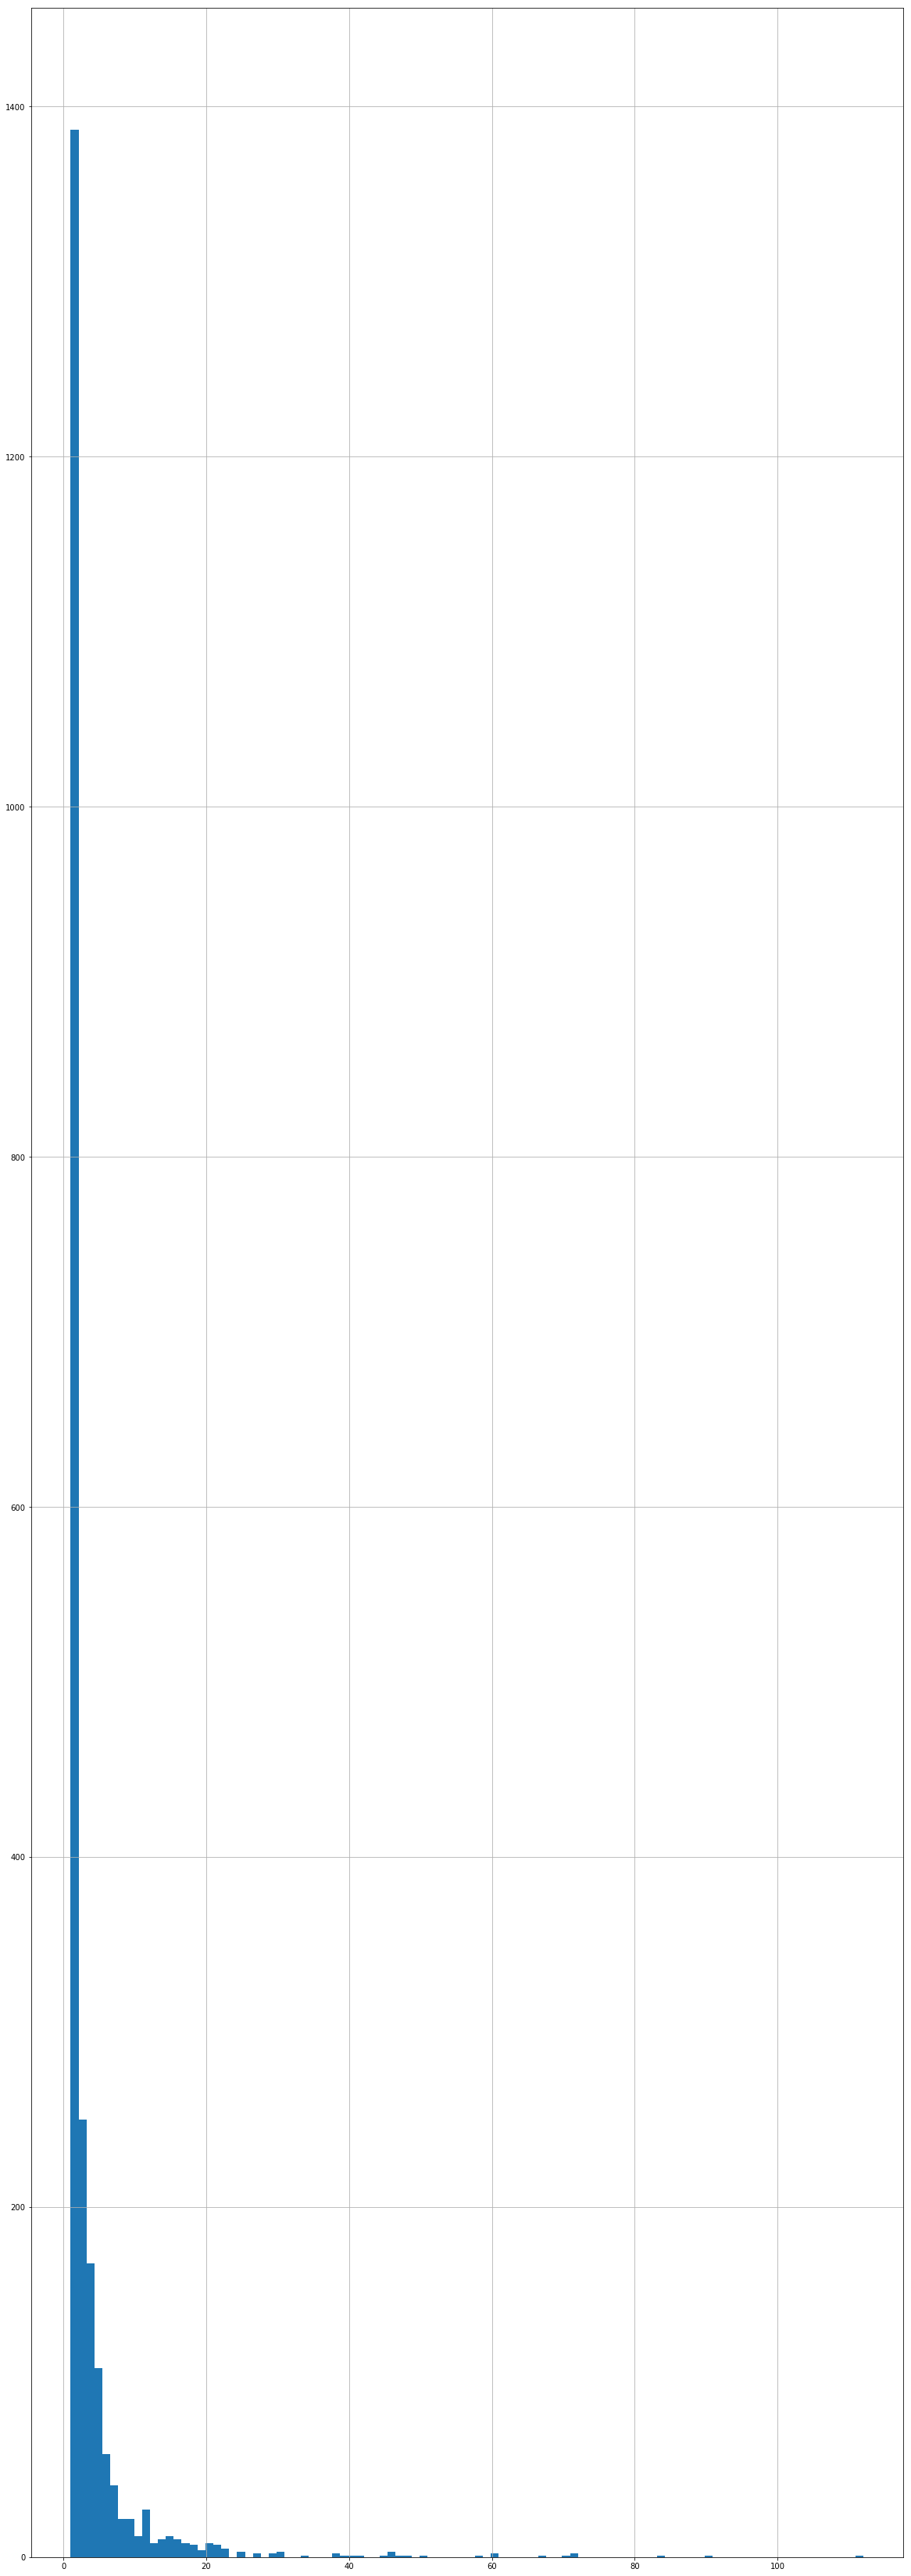

In [2]:
#Gráfico1: worth BUSD - dataframe completo
project1_df['worth BUSD'].hist(bins=100, figsize=(20,60))


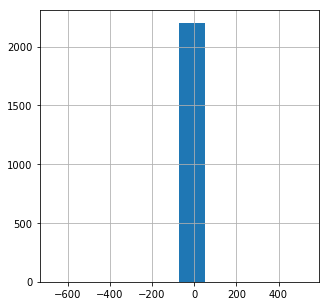

In [3]:
#Gráfico2: wortChange millions USD - dataframe completo
project1_df[' worthChange millions USD'].hist(bins=10, figsize=(5,5))


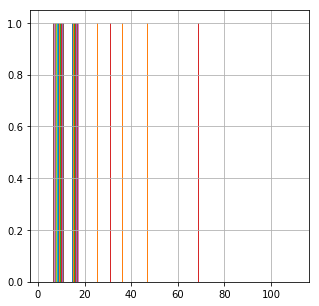

In [4]:
#Gráfico3: worth BUSD - dataframe outliers
outliers['worth BUSD'].hist(bins=10, figsize=(5,5))

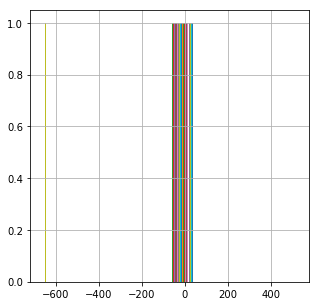

In [5]:
#Gráfico4: wortChange millions USD - dataframe outliers
outliers[' worthChange millions USD'].hist(bins=10, figsize=(5,5))

In [ ]:
#Gráfico5: country - dataframe completo
project1_df['country'].hist(bins=10, figsize=(5,5))